Utilizaremos los siguientes paquetes para facilitar los cálculos con JULIA:

Método de Newton-Raphson para hallar raices de de ecuaciones no lineales: https://www.matecdev.com/posts/julia-newton-raphson.html 

1.- MTH229: API que nos permite realizar calculos numéricos en el ecosistema de JULIA, en especial nos permite utilizar el método de Newton-Raphson de manera sencilla. Podemos ver su repositorio en el siguiente enlace https://github.com/mth229/232-projects https://mth229.github.io/229-projects/07-newton.html

2.- Plots: Paquete standard de gráficos https://mth229.github.io/graphing.html https://docs.juliaplots.org/latest/tutorial/

3.- LaTeXStrings: Permite escribir código LaTex en JULIA https://github.com/JuliaStrings/LaTeXStrings.jl

In [1]:
using MTH229, Plots, LaTeXStrings

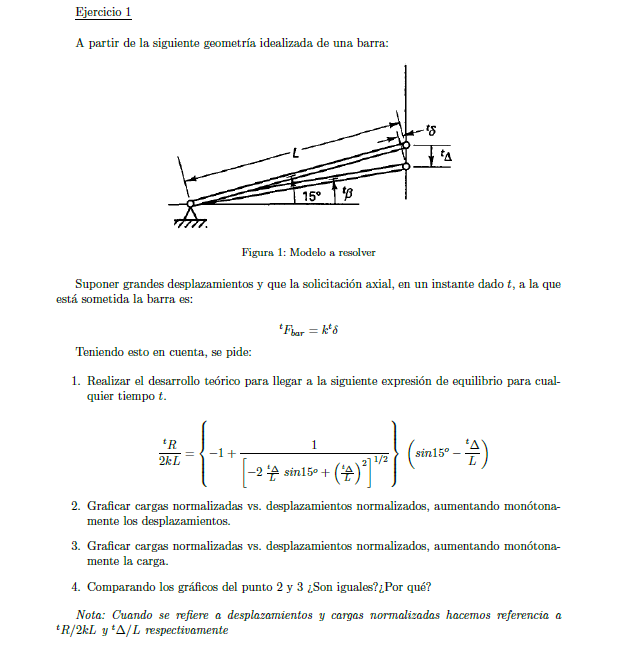

In [2]:
begin
    a = sin(π/12) # sin(15º) = sin(π/12)
    𝒇(x) = (-1+ 1/((1-2*x*a+x^2)^(1/2)))*(a-x); 
    𝒃(x)= 𝒇(find_zero(𝒇', (0, 0.2))); # 𝒇(x) para el valor de x en donde ocurre el máximo, 𝒇'-> primera derivada de 𝒇(x)
end

𝒃 (generic function with 1 method)

In [3]:
# Aumento monótono de desplazamientos normalizados.
# DIVIDIMOS EL DESPLAZAMIENTO EN 1000 PASOS. tomamos el desplazamiento máximo como 0.6
begin
    x = 0
    Δ = 0.6 / 1000
    #Fnorm = Array{Float64}([]) # Fnorm -> Fuerzas normalizadas
    Fnorm = []
    while x <= 0.6
        Fnorm = [Fnorm; 𝒇(x)] # Se va agregando el valor de la fuerza normalizada para cada desplazamiento normalizado
        x += Δ # Aumento monótono de desplazamientos normalizados
    end
    display(Fnorm)
end

1000-element Vector{Any}:
 0.0
 4.006204594298259e-5
 7.986369469812127e-5
 0.00011940535013924239
 0.00015868741732732276
 0.00019771030251009757
 0.0002364744131212016
 0.0002749801577799251
 0.00031322794629022024
 0.0003512181896407153
 0.000388951300003473
 0.00042642769073397956
 0.0004636477763701075
 ⋮
 0.007200673663053972
 0.007276450506780841
 0.007352529391728408
 0.007428910568830224
 0.007505594287849598
 0.00758258079738098
 0.007659870344849936
 0.007737463176514471
 0.007815359537465736
 0.00789355967162866
 0.007972063821762491
 0.008050872229462155

In [10]:
# Aumento monótono de fuerzas normalizadas.
# DIVIDIMOS LA FUERZA EN 1000 PASOS DE CARGA. tomamos la fuerza máxima como el valor máximo dado
# en el caso anterior
begin
    Fmax = 0.008050872229462155
    ΔF = Fmax / 1000
    desp = []
    Fnorm1 = []
    F = 0
    pt = 0.1
    while F <= Fmax
        #display(F)
        h(x) = 𝒇(x) - F
        # Utilizamos un bloque try/catch como método de manejo de excepciones, estas ocurren
        # cuando el algoritmo no converge evitamos que haya una parada del mismo por exepción.
        try
            desp = [desp; newton(h, pt)]
            Fnorm1 = [Fnorm1; F]            
        catch(error)
            #display(error) # En el caso de que haya excepción solo permitimos que el algoritmo continúe
        end 
        F += ΔF
    end
    display(desp)
    display(Fnorm1)
end

931-element Vector{Any}:
 -7.180739611275113e-16
  0.00012026325628236233
  0.0002406832870580421
  0.0003612606581840838
  0.0004819959388774748
  0.0006028897017412397
  0.0007239425227901028
  0.0008451549814823191
  0.0009665276607462493
  0.0010880611470100818
  0.0012097560302319085
  0.0013316129039283573
  0.001453632365205497
  ⋮
  0.5987255988378627
  0.5987870292372229
  0.5988484353156238
  0.5989098170999605
  0.5989711746170817
  0.5990325078937859
  0.5990938169568258
  0.5991551018329033
  0.5992163625486764
  0.599277599130751
  0.5993388116056882
  0.5994000000000015

931-element Vector{Any}:
 0
 8.050872229462155e-6
 1.610174445892431e-5
 2.4152616688386465e-5
 3.220348891784862e-5
 4.025436114731077e-5
 4.830523337677292e-5
 5.6356105606235075e-5
 6.440697783569723e-5
 7.245785006515938e-5
 8.050872229462153e-5
 8.855959452408368e-5
 9.661046675354583e-5
 ⋮
 0.007962312634938065
 0.007970363507167526
 0.007978414379396987
 0.007986465251626449
 0.00799451612385591
 0.008002566996085371
 0.008010617868314833
 0.008018668740544294
 0.008026719612773755
 0.008034770485003217
 0.008042821357232678
 0.008050872229462139

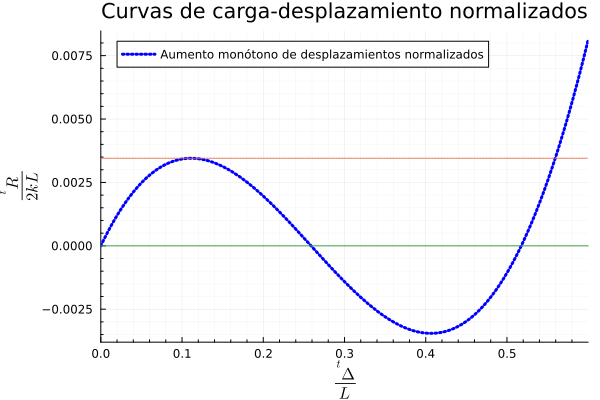

In [11]:
plot(minorgrid=true, title="Curvas de carga-desplazamiento normalizados")
plot!(𝒇, 0, 0.6, lc=:blue, ls=:dot, lw=:3, label="Aumento monótono de desplazamientos normalizados")
plot!(𝒃, ls = :dot, label = false)
plot!(zero, label = false)
xlims!(0, 0.6)
ylabel!(L"\frac{^tR}{2kL}")
xlabel!(L"\frac{^t\Delta}{L}")

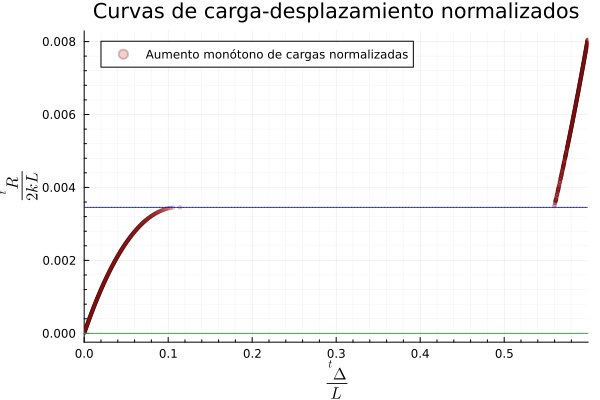

In [12]:
plot(minorgrid=true, title="Curvas de carga-desplazamiento normalizados")
scatter!(desp, Fnorm1, ms=2, ma=0.2, mc=:red, label="Aumento monótono de cargas normalizadas")
#plot!(desp, Fnorm1, ms=2, ma=0.1, mc=:red, label="Aumento monótono de cargas normalizadas")
plot!(𝒃, ls = :dot, label = false, lc=:blue)
xlims!(0, 0.6)
plot!(zero, label = false)
ylabel!(L"\frac{^tR}{2kL}")
xlabel!(L"\frac{^t\Delta}{L}")